In [3]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'matplotlib'

# 树模型的可视化
* 安装 graphviz: brew install graphviz


In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris() # 花的数据集。。。
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y) # 训练

DecisionTreeClassifier(max_depth=2)

In [ ]:
from sklearn.tree import export_graphviz


# 决策树中的正则化（预剪枝，避免过拟合）
DecisionTreeClassifier 中提供了以下（部分）参数支持：
- min_samples_split：节点能被分割的最小样本数，即小于该数则直接归为一类，使用其众数为值。
- min_samples_leaf: 叶子节点最少需要的样本数。比如对于一个有10个样本的节点，它分裂后可能为 2/8，但由于最小样本数限制为5，则不可再分裂。
- max_leaf_nodes：最大叶子节点数量。
- max_features：最多使用的特征数。通常不作限制，而采用树深度来限制
- max_depth: 最大树深。

# 决策边界展示

In [6]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo', label="iris-setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs', label="iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], 'g', label="iris-Virginica")
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.xlabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

/var/folders/xh/250r_b1d10q0kklv9g7rwq4c0000gn/T/ipykernel_47286/497429564.py:13: UserWarning: No contour levels were found within the data range.
  plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)


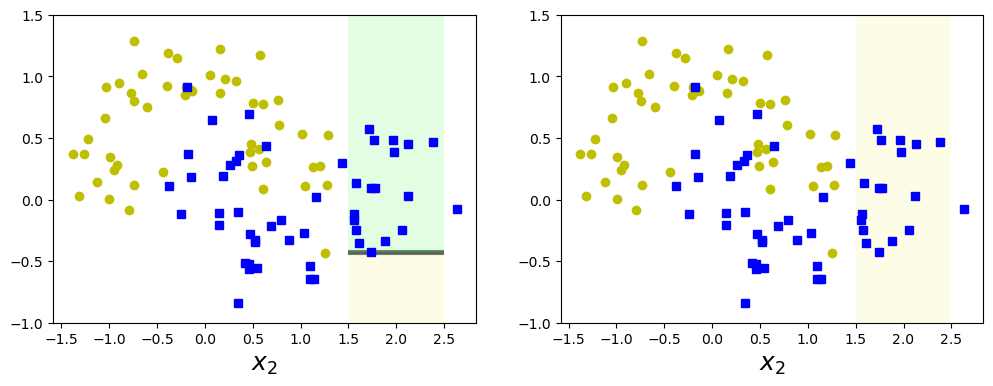

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=53) # 使用 sklearn 中的月亮的数据集
tree_clf1 = DecisionTreeClassifier(random_state=42) # 
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

tree_clf1.fit(X, y)
tree_clf2.fit(X, y)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf1, X, y, axes=[1.5, 2.5, -1, 1.5], iris=False)

plt.subplot(122)
plot_decision_boundary(tree_clf2, X, y, axes=[1.5, 2.5, -1, 1.5], iris=False)

# 回归任务
采用方差作为评估标准。

In [ ]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)